In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("Desktop/contour.jpeg")
blurred = cv2.GaussianBlur(image, (15, 15), 0)
dst = cv2.fastNlMeansDenoisingColored(blurred,None,10,10,7,21)
#cv2.imshow("dst",dst)
#cv2.waitKey(0)

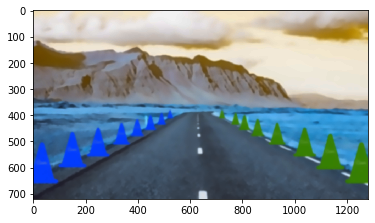

In [3]:
plt.imshow(dst)
plt.show()

In [4]:
rgb_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

In [5]:
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

In [6]:
#cv2.imshow("hsv",hsv_img)
#cv2.waitKey(0)

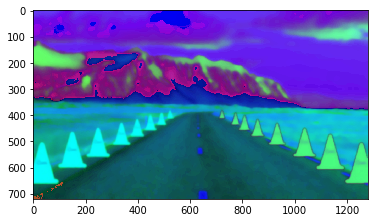

In [7]:
plt.imshow(hsv_img)
plt.show()

In [8]:
light_orange = (1, 200, 220)
dark_orange = (18, 255, 255)

In [9]:
light_green = (36, 0, 0)
dark_green = (86, 255, 255)

In [10]:
mask1 = cv2.inRange(hsv_img, light_orange, dark_orange)
mask2 = cv2.inRange(hsv_img, light_green, dark_green)

In [11]:
mask = mask1+mask2

In [12]:
#cv2.imshow("mask",mask)
#cv2.waitKey(0)

In [13]:
result = cv2.bitwise_and(image, image, mask=mask)

In [14]:
#cv2.imshow("result",result)
#cv2.waitKey(0)

In [15]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

In [1]:
for c in cnts:
#Defining a condition to draw the contours, a number larger than/smaller than or between ranges
    x = 266.0
    if cv2.contourArea(c) > x:
        x, y, w, h = cv2.boundingRect(c)
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        #cv2.drawContours(output, [c], 0, (0,255,0), 3)
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 3)
        cv2.circle(output, (cX, cY), 3, (0, 255, 0), -1)

NameError: name 'cnts' is not defined

In [17]:
final = output.copy()
cv2.line(final, (650, 0), (650, 720), (255, 0, 0), 5)
cv2.imshow("Contours", final)
cv2.waitKey(0)

115

In [18]:
def findFoot(center_x, center_y):
    temp = -1 * (1 * center_x - 650) 
    foot_x = temp * 1 + center_x  
    foot_y = center_y  
    return (foot_x,foot_y)

In [19]:
vf_top_point = (650, 0)
vf_top_point = np.asarray(vf_top_point)
vf_bottom_point = (650, 720)
vf_bottom_point = np.asarray(vf_bottom_point)
lst_dist = []
for c in cnts:
    x = 266.8
    if cv2.contourArea(c) > x:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        center = (cX,cY)
        foot = findFoot(center[0],center[1])
        cv2.line(final, center, foot, (255, 0, 0), 3)
        center = np.asarray(center)
        dist_from_vf = np.cross(vf_bottom_point-vf_top_point, vf_top_point-center)/np.linalg.norm(vf_bottom_point-vf_top_point)
        lst_dist.append(dist_from_vf)
        cv2.imshow("Contours", final)
        cv2.waitKey(0)

In [20]:
lst_dist

[-614.0,
 597.0,
 485.0,
 -501.0,
 386.0,
 -402.0,
 -313.0,
 281.0,
 -254.0,
 207.0,
 -203.0,
 -161.0,
 144.0,
 -126.0,
 71.0,
 -553.0]